---
title: Fitting simple trends to data using linear regression
---

We shall see how simple trend functions can be fit to time series data using linear regression over the time variable (and over other functions of the time variable such as higher powers and sines and cosines). We start with the US population dataset. 

## US Population Dataset

This dataset is downloaded from FRED and gives monthly population of the United States in thousands. 

In [3]:
import pandas as pd
uspop = pd.read_csv('POPTHM_01September2025.csv')
print(uspop.head(15))
print(uspop.shape)

   observation_date  POPTHM
0        1959-01-01  175818
1        1959-02-01  176044
2        1959-03-01  176274
3        1959-04-01  176503
4        1959-05-01  176723
5        1959-06-01  176954
6        1959-07-01  177208
7        1959-08-01  177479
8        1959-09-01  177755
9        1959-10-01  178026
10       1959-11-01  178273
11       1959-12-01  178504
12       1960-01-01  178925
13       1960-02-01  179326
14       1960-03-01  179707
(799, 2)


We shall take the covariate variable as $x$ which takes the values $1, \dots, n$. Then we shall fit a linear function of $x$ to the observed time series $y$ using linear regression. 

In [4]:
y = uspop['POPTHM']
import numpy as np
x = np.arange(1, len(y)+1) #this is the covariate 
import statsmodels.api as sm
X = sm.add_constant(x)
linmod = sm.OLS(y, X).fit()
print(linmod.summary())
print(linmod.params)

                            OLS Regression Results                            
Dep. Variable:                 POPTHM   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.740e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:19:27   Log-Likelihood:                -7434.1
No. Observations:                 799   AIC:                         1.487e+04
Df Residuals:                     797   BIC:                         1.488e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.745e+05    188.487    925.579      0.0

The estimated slope parameter $\hat{\beta}_1$ is 213.684996. The interpretation of this is: the population grows by 213684.996 (note that unit of y is thousands) for every month.  The estimated intercept parameter $\hat{\beta}_0$ is $174459.566196$.This is an estimate of the population at time 0 which corresponds to December 1958. The standard errors provide estimates of the uncertainty in $\hat{\beta}_0$ and $\hat{\beta}_1$. 

To see how well the regression line fits the data, we can plot the line over the original data, as follows.  

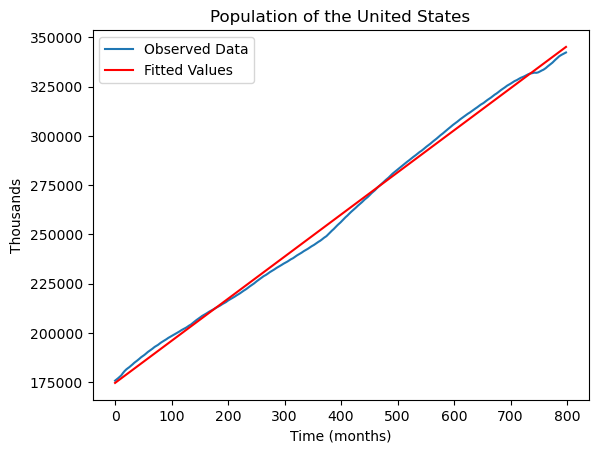

In [5]:
import matplotlib.pyplot as plt
plt.plot(y, label = "Observed Data")
plt.plot(linmod.fittedvalues, label = 'Fitted Values', color = 'red')
plt.xlabel('Time (months)')
plt.ylabel('Thousands')
plt.title('Population of the United States')
plt.legend()
plt.show()

The fit is decent and the line gives a good idea of the overall population growth. However there are some time periods where the population growth diverges from the overall regression line. 

The fitted regression line allows us to predict the US population at future time points. This is illustrated below. First note that the given dataset gives population numbers until July 2025: 

In [6]:
print(uspop.tail(15))

    observation_date  POPTHM
784       2024-05-01  339927
785       2024-06-01  340213
786       2024-07-01  340448
787       2024-08-01  340637
788       2024-09-01  340825
789       2024-10-01  341002
790       2024-11-01  341169
791       2024-12-01  341320
792       2025-01-01  341454
793       2025-02-01  341588
794       2025-03-01  341729
795       2025-04-01  341874
796       2025-05-01  342032
797       2025-06-01  342197
798       2025-07-01  342370


The last (799th) observation corresponds to July 2025. Suppose we want to predict the population for August 2025. This corresponds to $x = 800$. The prediction is given by: $\hat{\beta}_0 + 800 \hat{\beta}_1$. 

In [7]:
predAug2025 = linmod.params.iloc[0] + 800*linmod.params.iloc[1]
print(predAug2025)

345407.5627146716


The predicted US population for January 2025 is therefore 345.40756 million (note the units of $y$ are thousands).

linmod supports a function which gives the prediction automatically and also gives uncertainty quantification for the prediction. 

In [9]:
print(linmod.get_prediction([1, 800]).summary_frame())
#use linmod.get_prediction([[1, 793], [1, 795]]).summary_frame() to get multiple predictions at x = 793 and x = 795


            mean     mean_se  mean_ci_lower  mean_ci_upper   obs_ci_lower  \
0  345407.562715  188.487027   345037.57306  345777.552369  340170.212653   

    obs_ci_upper  
0  350644.912776  


The get_prediction function gives two uncertainty intervals. The first is for the **mean** of the prediction, and the second is for the prediction itself. We shall see how these intervals are obtained in a later lecture/lab. The commonly used uncertainty interval is the second one, which in this case, is $[340170.212653, 350644.912776]$ thousands. 

## Google Trends Dataset for the query Amazon

https://trends.google.com/trends/ is another (in addition to FRED) great source for time series datasets (see https://en.wikipedia.org/wiki/Google_Trends). The following is the trends monthly dataset for the query "amazon". 

In [11]:
amazon = pd.read_csv('AmazonTrends05Sept2025.csv', skiprows = 1)
#we are skipping the first row as it does not contain any data 
print(amazon.head())
amazon.columns = ['Month', 'AmazonTrends']
print(amazon.tail(10))

     Month  amazon: (Worldwide)
0  2004-01                   15
1  2004-02                   14
2  2004-03                   15
3  2004-04                   14
4  2004-05                   14
       Month  AmazonTrends
251  2024-12            69
252  2025-01            58
253  2025-02            53
254  2025-03            54
255  2025-04            53
256  2025-05            53
257  2025-06            55
258  2025-07            61
259  2025-08            61
260  2025-09            57


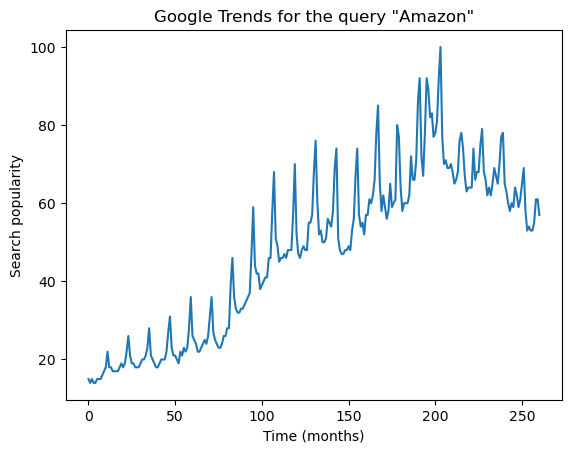

In [12]:
#Here is a plot of the data
plt.plot(amazon['AmazonTrends'])
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google Trends for the query "Amazon"')
plt.show()

In [13]:
#Fitting a line: 
y = amazon['AmazonTrends'] #should we be taking logs instead as in y = np.log(amazon['AmazonTrends'])
x = np.arange(1, len(y) + 1)
X = sm.add_constant(x)
linmod = sm.OLS(y, X).fit()
print(linmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     897.9
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           3.76e-86
Time:                        01:33:02   Log-Likelihood:                -970.39
No. Observations:                 261   AIC:                             1945.
Df Residuals:                     259   BIC:                             1952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4385      1.242     12.431      0.0

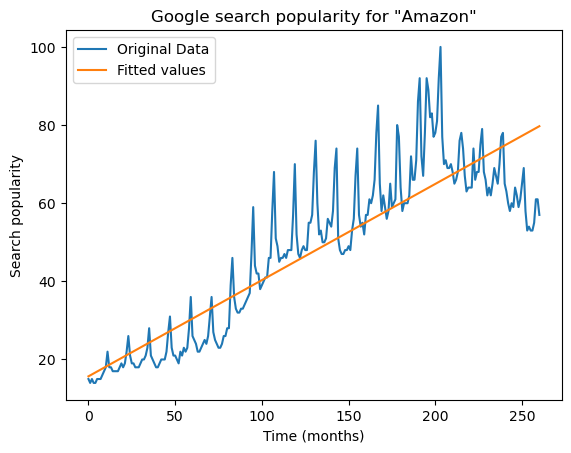

In [15]:
plt.plot(y, label = 'Original Data')
plt.plot(linmod.fittedvalues, label = "Fitted values")
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

The line does not capture the trend in the data well. We can improve the model by adding a quadratic term. 

In [16]:
#Let us add a quadratic term: 
x2 = x ** 2
X = np.column_stack([x, x2])
X = sm.add_constant(X)
quadmod = sm.OLS(y, X).fit()
print(quadmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     638.9
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          1.16e-100
Time:                        01:33:42   Log-Likelihood:                -932.92
No. Observations:                 261   AIC:                             1872.
Df Residuals:                     258   BIC:                             1883.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1785      1.625      2.572      0.0

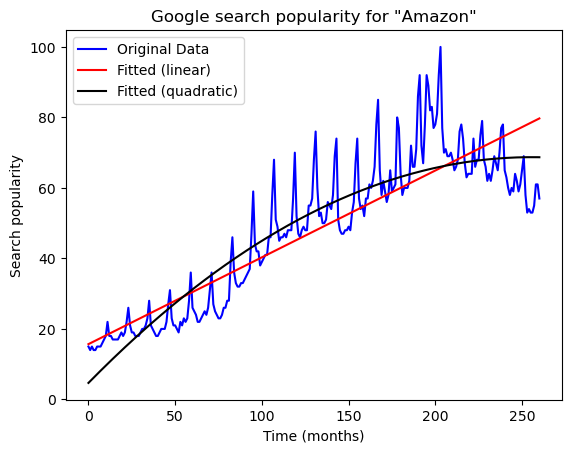

In [17]:
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(linmod.fittedvalues, label = "Fitted (linear)", color = 'red')
plt.plot(quadmod.fittedvalues, label = "Fitted (quadratic)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

The fit is still not good. Let us add a cubic term. 

In [18]:
#Cubic term: 
x2 = x ** 2
x3 = x ** 3
X = np.column_stack([x, x2, x3])
X = sm.add_constant(X)
cubmod = sm.OLS(y, X).fit()
print(cubmod.summary())

                            OLS Regression Results                            
Dep. Variable:           AmazonTrends   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     685.4
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          2.87e-122
Time:                        01:33:59   Log-Likelihood:                -878.96
No. Observations:                 261   AIC:                             1766.
Df Residuals:                     257   BIC:                             1780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7787      1.777     10.005      0.0

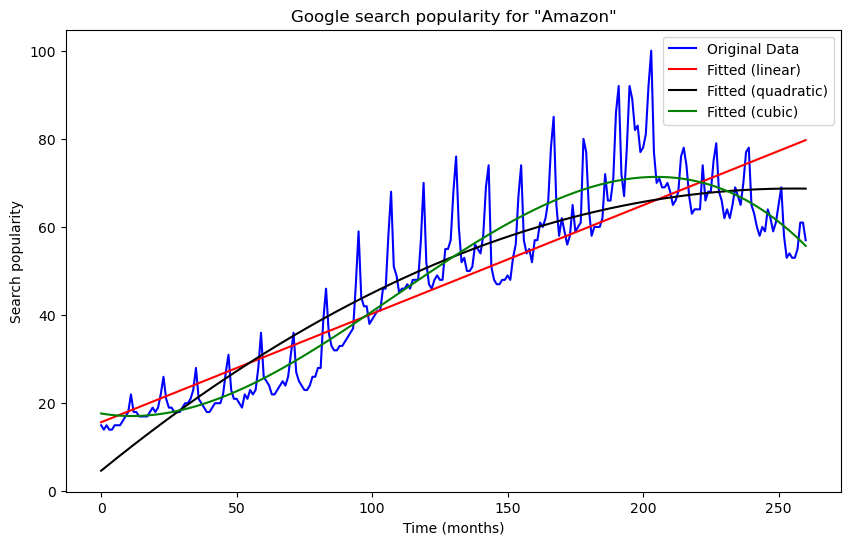

In [19]:
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(linmod.fittedvalues, label = "Fitted (linear)", color = 'red')
plt.plot(quadmod.fittedvalues, label = "Fitted (quadratic)", color = 'black')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'green')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()

Now the fit is pretty good. This is a monthly dataset which also has a clear seasonal pattern. Some months in each year have a high $y$ value compared to other months. We can capture this seasonal pattern by adding cosines and sines to the regression model. The simplest seasonal functions with period $12$ are $\cos(2 \pi x/12)$ and $\sin(2 \pi x/12)$. Let us add these to the model. 

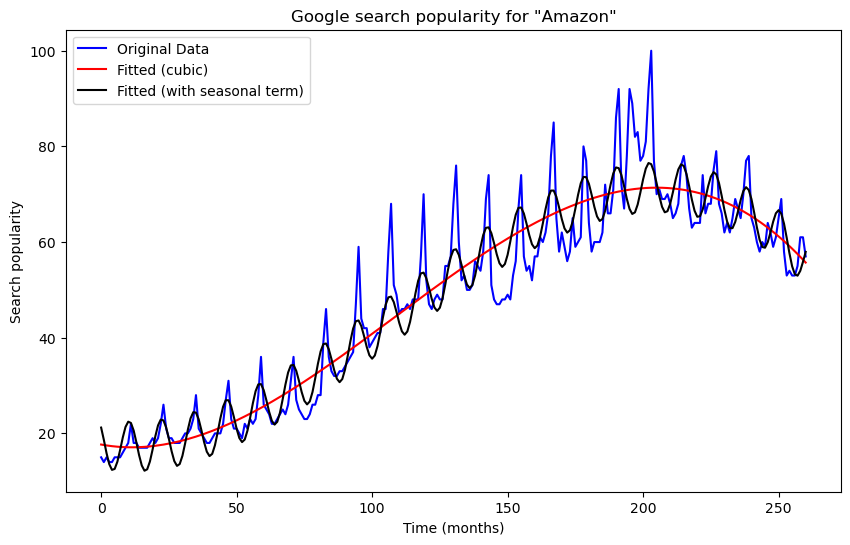

In [20]:
#Adding seasonal terms to the model: 
x4 = np.cos(2 * np.pi * x * (1/12))
x5 = np.sin(2 * np.pi * x * (1/12))
X = np.column_stack([x, x2, x3, x4, x5])
X = sm.add_constant(X)
seasmod1 = sm.OLS(y, X).fit()
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'red')
plt.plot(seasmod1.fittedvalues, label = "Fitted (with seasonal term)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()


The fit is better but the seasonal term is not enough to capture the actual oscillation present in the data. We improve the fit by adding two more seasonal functions $\cos(2 \pi x (2/12))$ and $\sin(2 \pi x (2/12))$. 

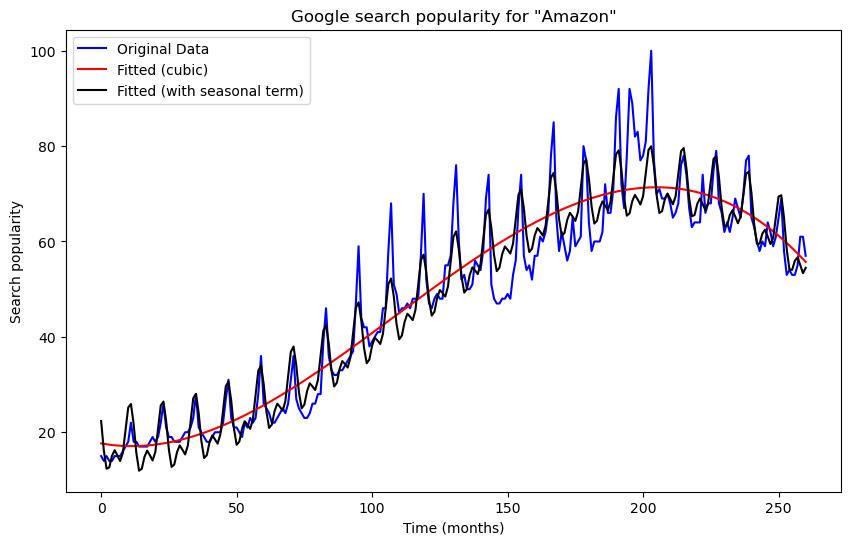

In [21]:
#Adding seasonal terms to the model: 
x4 = np.cos(2 * np.pi * x * (1/12))
x5 = np.sin(2 * np.pi * x * (1/12))
x6 = np.cos(2 * np.pi * x * (2/12))
x7 = np.sin(2 * np.pi * x * (2/12))
X = np.column_stack([x, x2, x3, x4, x5, x6, x7])
X = sm.add_constant(X)
seasmod = sm.OLS(y, X).fit()
plt.figure(figsize = (10, 6))
plt.plot(y, label = 'Original Data', color = 'blue')
plt.plot(cubmod.fittedvalues, label = "Fitted (cubic)", color = 'red')
plt.plot(seasmod.fittedvalues, label = "Fitted (with seasonal term)", color = 'black')
plt.xlabel('Time (months)')
plt.ylabel('Search popularity')
plt.title('Google search popularity for "Amazon"')
plt.legend()
plt.show()


The fit is much improved (even though there is still some discrepancy between the seasonal oscillations in the data and the fitted function). We can use this model to predict the data for a bunch of future time points. 

In [22]:
#Computing future predictions: 
nf = 100 #number of future points where we are calculating predictions
xf = np.arange(len(x) + 1, len(x) + 1 + nf) #these are the future time points
x2f = xf ** 2
x3f = xf ** 3
x4f = np.cos(2 * np.pi * xf * (1/12))
x5f = np.sin(2 * np.pi * xf * (1/12))
x6f = np.cos(2 * np.pi * xf * (2/12))
x7f = np.sin(2 * np.pi * xf * (2/12))
Xf = np.column_stack([xf, x2f, x3f, x4f, x5f, x6f, x7f])
Xf = sm.add_constant(Xf)
pred = Xf @ np.array(seasmod.params) #these are the predictions
print(pred)

[ 58.69757163  62.83107246  62.94640673  58.10579472  51.3433054
  46.94061484  46.63211642  48.40381473  48.94419146  47.17909445
  45.29588483  46.24607014  50.3068321   54.27037919  54.2146893
  49.20198269  42.26632834  37.68940231  37.205598    38.80091997
  39.16384994  37.22023573  35.15743848  35.92696573  39.8059992
  43.58674737  43.34718811  38.14954171  31.02787713  26.26387045
  25.59191504  26.9980155   27.17065351  25.03567691  22.78044685
  23.35647084  27.04093062  30.62603467  30.18976086  24.79432948
  17.47380948  12.50987695  11.63692526  12.840959    12.81045986
  10.47127569   8.0107676    8.38044315  11.85748405  15.23409879
  14.58826524   8.98220368   1.44998307  -3.7267205   -4.81351367
  -3.82439184  -4.07087331  -6.62711026  -9.30574155  -9.15525964
  -5.89848281  -2.74320258  -3.61144106  -9.44097799 -17.1977444
 -22.60006421 -23.91354404 -23.15217931 -23.62748832 -26.41362324
 -29.32322292 -29.40477984 -26.38111228 -23.46001174 -24.56350036
 -30.62935785 

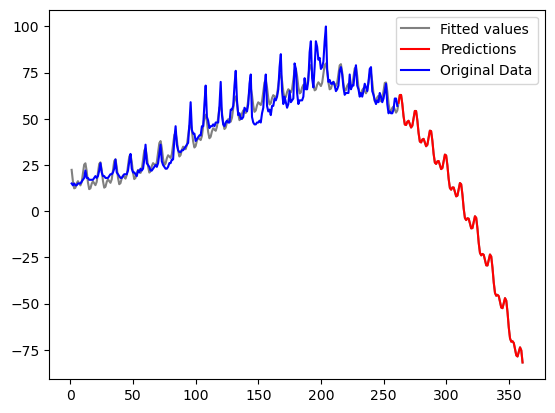

In [23]:
#Plotting the data, fitted values and predictions
xall = np.concatenate([x, xf])
fittedpred = np.concatenate([seasmod.fittedvalues, pred])
#plt.figure(figsize = (10, 6))
#print(x)
#print(xf)
plt.plot(xall, fittedpred, color = 'gray', label = 'Fitted values')
plt.plot(xf, pred, color = 'red', label = 'Predictions')
plt.plot(x, y, label = 'Original Data', color = 'blue')
plt.legend()
plt.show()

Note that the future predictions become negative after a certain time. This is because the predictions follow the decreasing trend in the cubic function near the right end of the dataset. In this particular problem, negative predictions are meaningless. This issue can be fixed if we fit models to the logarithms of the original data. The model predictions will then have to be exponentiated if we want predictions for the original data. This exponentiation will ensure that all predictions are positive. 

[4.05879994 4.14334257 4.15285342 4.06392616 3.93021997 3.83524535
 3.81923837 3.85046614 3.8665653  3.84200082 3.81282069 3.83416063
 3.9147213  3.99652373 4.00328036 3.91158485 3.77509639 3.67732549
 3.65850819 3.68691162 3.70017242 3.67275556 3.64070903 3.65916855
 3.73683478 3.81572874 3.81956288 3.72493086 3.58549186 3.4847564
 3.46296053 3.48837136 3.49862554 3.46818804 3.43310684 3.44851767
 3.52312119 3.59893842 3.5996818  3.501945   3.35938721 3.25551893
 3.23057621 3.25282617 3.25990547 3.22627905 3.18799493 3.2001888
 3.27156135 3.34413358 3.34161794 3.2406081  3.09476324 2.98759388
 2.95933605 2.97825688 2.98199303 2.94500944 2.90335411 2.91216277
 2.98013607 3.04929504 3.04335212 2.93890098 2.78960079 2.67896207
 2.64722087 2.66264431 2.66286903 2.62236001 2.57716522 2.5824204
 2.64682619 2.71240363 2.70286516 2.59480444 2.44188066 2.32760433
 2.29221149 2.30396927 2.30051431 2.25631158 2.20740907 2.20894249
 2.26961252 2.33144017 2.31813788 2.20629933 2.04958369 1.9315014

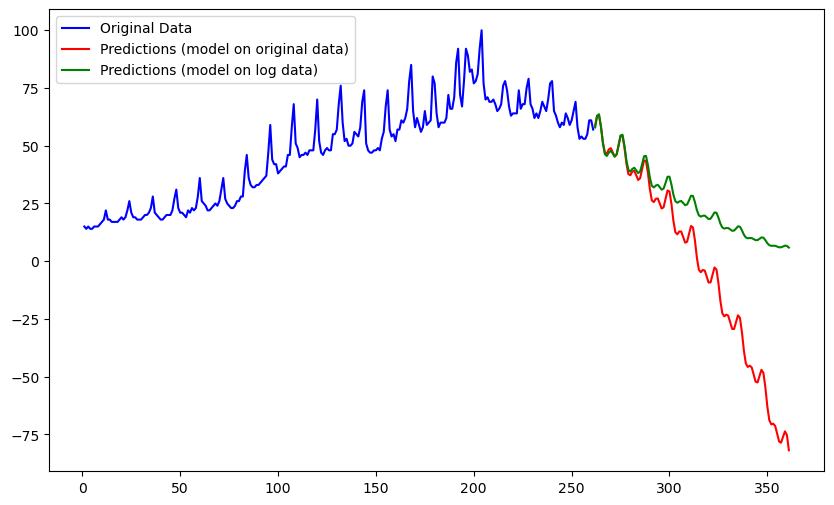

In [24]:
#Prediction on log(data):
ylog = np.log(amazon['AmazonTrends'])
seasmodlog = sm.OLS(ylog, X).fit()
predlog = Xf @ np.array(seasmodlog.params)
print(predlog)

xall = np.concatenate([x, xf])
fittedpred_logmodel = np.concatenate([np.exp(seasmodlog.fittedvalues), np.exp(predlog)])
plt.figure(figsize = (10, 6))
#print(x)
#print(xf)
plt.plot(x, y, label = 'Original Data', color = 'blue')
plt.plot(xf, pred, color = 'red', label = 'Predictions (model on original data)')
#plt.plot(xall, fittedpred_logmodel, color = 'black')
plt.plot(xf, np.exp(predlog), color = 'green',  label = 'Predictions (model on log data)')
plt.legend()
plt.show()

## Derivation of the Least Squares Estimators in Simple Linear Regression

The least squares estimators $\hat{\beta}_0$ and $\hat{\beta}_1$ minimize $$S(\beta_0, \beta_1) := \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2$$ over all values of $\beta_0$ and $\beta_1$. In class, the following formulae were stated: 
\begin{equation*}
   \hat{\beta}_1 = \frac{\sum_{i=1}^n (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^n (x_i - \bar{x})^2} \text{ and } \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}. 
\end{equation*}
Here is how to prove it. We need to take the derivative of $S(\beta_0, \beta_1)$ with respect to $\beta_0$ and $\beta_1$ and equate them to zero. This gives: 
\begin{align*}
   &\frac{\partial}{\partial \beta_0} S(\beta_0, \beta_1) = 0 \implies \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i) = 0 \\
   &\frac{\partial}{\partial \beta_1} S(\beta_0, \beta_1) = 0 \implies \sum_{i=1}^n x_i(y_i - \beta_0 - \beta_1 x_i) = 0 
\end{align*}
Clearly the first equation is the same as: 
\begin{equation*}
   \beta_0 = \bar{y} - \beta_1 \bar{x}. 
\end{equation*}
Plugging this value of $\beta_0$ in the second equation, we get
\begin{equation*}
    0 = \sum_{i=1}^n x_i (y_i - \bar{y} - \beta_1 (x_i - \bar{x})) \implies \beta_1 = \frac{\sum_{i=1}^n x_i (y_i - \bar{y})}{\sum_{i=1}^n x_i (x_i - \bar{x})} = \frac{\sum_{i=1}^n (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^n (x_i - \bar{x})^2}. 
\end{equation*}
There is a slightly different way of solving the equations. Use the vector matrix notation: 
\begin{align*}
   y = \begin{pmatrix} y_1 \\ y_2 \\ \cdot \\ \cdot \\ \cdot \\ y_n \end{pmatrix} ~~ X = \begin{pmatrix}1 & x_1 \\ 1 & x_2 \\ \cdot & \cdot \\ \cdot & \cdot \\ \cdot & \cdot \\ 1 & x_n \end{pmatrix} ~~ \beta = \begin{pmatrix}\beta_0 \\ \beta_1 \end{pmatrix}. 
\end{align*}
The two equations corresponding to $\frac{\partial}{\partial \beta_0} S(\beta_0, \beta_1) = 0$ and $\frac{\partial}{\partial \beta_1} S(\beta_0, \beta_1) = 0$ can be written using this notation as: 
\begin{align*}
  X^T (y - X \beta) = 0 \implies X^T X \beta = X^T y \implies \beta = (X^T X)^{-1} X^T y. 
\end{align*}
Writing out $(X^T X)^{-1}$ and multiplying out the product above, we can deduce the formulae for $\hat{\beta}_0$ and $\hat{\beta}_1$.
